In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA




In [3]:

Data1 = pd.read_csv('/Users/nileshkhatiya/Downloads/BF_ExchangeRatesData1.csv')

In [87]:
Data1 = Data1.dropna(axis=1, how='all')
Data1.reset_index(inplace=True)
print(Data1.head())

       Dates  IND (CPI)  USA(CPI)  Nominal ER(IND)  Nominal ER(USA)  \
0 2012-01-01       75.7      95.6            51.35           0.0195   
1 2012-02-01       76.1      96.1            49.16           0.0203   
2 2012-03-01       76.9      96.8            50.32           0.0199   
3 2012-04-01       78.4      97.1            51.80           0.0193   
4 2012-05-01       78.8      97.0            54.47           0.0184   

   RER(e * (P*/P)  Nominal_Log   Real_Log  Home_CPI_Log  Foreign_CPI_Log  
0       64.848877      3.938665  4.172060      4.326778         4.560173  
1       62.079842      3.895080  4.128421      4.332048         4.565389  
2       63.341691      3.918403  4.148544      4.342506         4.572647  
3       64.155357      3.947390  4.161308      4.361824         4.575741  
4       67.050635      3.997650  4.205448      4.366913         4.574711  


In [8]:
# Step C

Data1['Nominal_Log '] = np.log(Data1['Nominal ER(IND)'])
Data1['Real_Log'] = np.log(Data1['RER(e * (P*/P)'])
Data1['Home_CPI_Log'] = np.log(Data1['IND (CPI)'])
Data1['Foreign_CPI_Log'] = np.log(Data1['USA(CPI)'])

In [88]:
Data1.head(10)

,Dates,IND (CPI),USA(CPI),Nominal ER(IND),Nominal ER(USA),RER(e * (P*/P),Nominal_Log,Real_Log,Home_CPI_Log,Foreign_CPI_Log
0,2012-01-01,75.7,95.6,51.35,0.0195,64.848877,3.938665,4.172060,4.326778,4.560173
1,2012-02-01,76.1,96.1,49.16,0.0203,62.079842,3.895080,4.128421,4.332048,4.565389
2,2012-03-01,76.9,96.8,50.32,0.0199,63.341691,3.918403,4.148544,4.342506,4.572647
3,2012-04-01,78.4,97.1,51.80,0.0193,64.155357,3.947390,4.161308,4.361824,4.575741
4,2012-05-01,78.8,97.0,54.47,0.0184,67.050635,3.997650,4.205448,4.366913,4.574711
5,2012-06-01,79.6,96.8,56.03,0.0178,68.136985,4.025887,4.221520,4.377014,4.572647
6,2012-07-01,81.1,96.7,55.49,0.0180,66.163785,4.016203,4.192133,4.395683,4.571613
7,2012-08-01,81.9,97.2,55.56,0.0180,65.939341,4.017464,4.188735,4.405499,4.576771
8,2012-09-01,82.2,97.6,54.61,0.0183,64.841071,4.000217,4.171939,4.409155,4.580877
9,2012-10-01,83.0,97.6,53.02,0.0189,62.346410,3.970669,4.132706,4.418841,4.580877


IND (CPI)          0
USA(CPI)           0
Nominal ER(IND)    0
Nominal ER(USA)    0
RER(e * (P*/P)     0
Nominal_Log        0
Real_Log           0
Home_CPI_Log       0
Foreign_CPI_Log    0
dtype: int64


       Nominal_Log     Real_Log  Home_CPI_Log  Foreign_CPI_Log
count    999.000000  999.000000    999.000000       999.000000
mean       4.391767    4.247520      4.982413         4.838166
std        0.086843    0.035662      0.130336         0.075476
min        3.895080    4.101089      4.326778         4.560173
25%        4.421728    4.260558      5.027165         4.865995
50%        4.421728    4.260558      5.027165         4.865995
75%        4.421728    4.260558      5.027165         4.865995
max        4.421728    4.272555      5.036303         4.866765


<Figure size 1200x800 with 0 Axes>

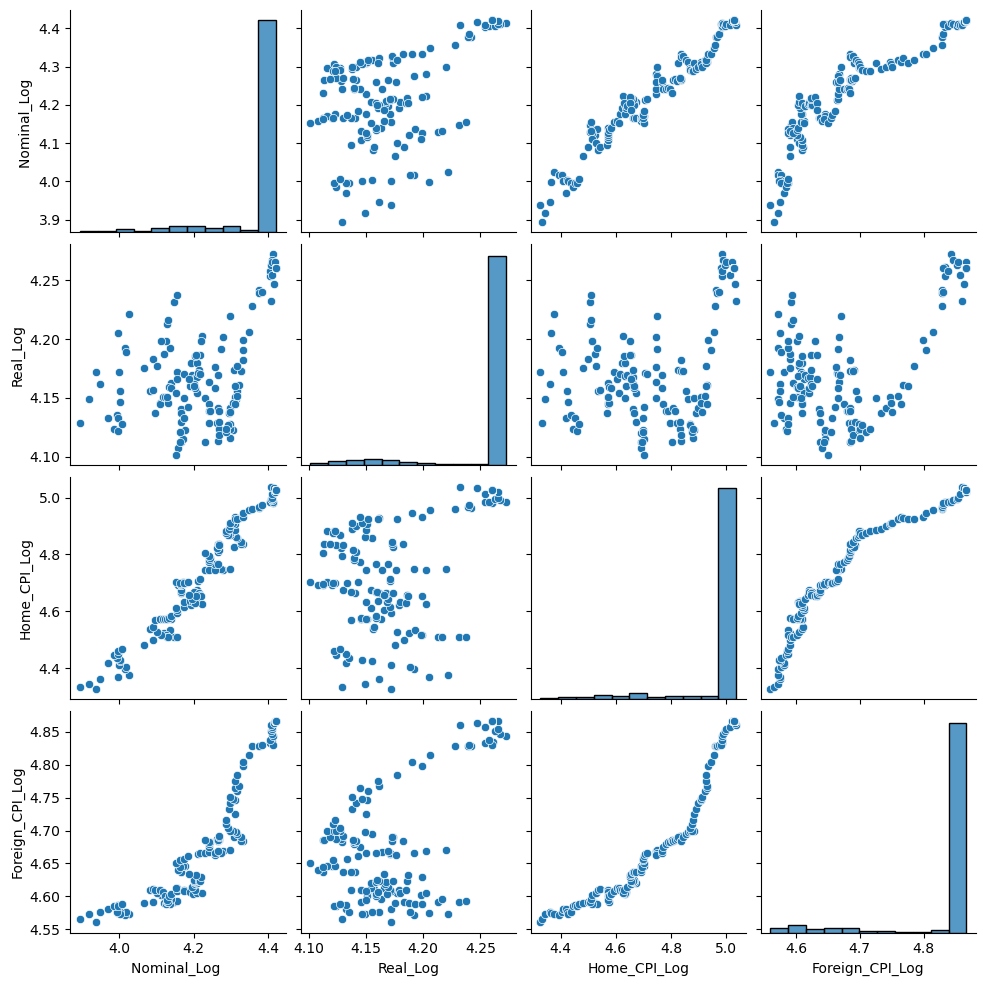

Correlation Matrix:
                 Nominal_Log   Real_Log  Home_CPI_Log  Foreign_CPI_Log
Nominal_Log          1.000000  0.860961      0.991258         0.967946
Real_Log             0.860961  1.000000      0.824884         0.906315
Home_CPI_Log         0.991258  0.824884      1.000000         0.976053
Foreign_CPI_Log      0.967946  0.906315      0.976053         1.000000


"Data1_Properties = Data1[['Nominal_Log ', 'Real_Log', 'Home_CPI_Log', 'Foreign_CPI_Log']].describe()\nprint(Data1_Properties)\n\nplt.figure(figsize=(8, 6))\nplt.hist(Data1['Nominal_Log '], bins=20, color='skyblue', edgecolor='black')\nplt.title('Distribution of Log of Nominal Exchange Rate')\nplt.xlabel('Nominal_Log ')\nplt.ylabel('Frequency')\nplt.grid(True)\nplt.show()\n\n# Visualize the trend of LogCPI_Home over time\nData1['Dates'] = pd.to_datetime(Data1['Dates'], format='%b-%y')\n\nplt.figure(figsize=(10, 6))\nplt.plot(Data1['Dates'], Data1['Home_CPI_Log'], marker='o', color='green', linestyle='-')\nplt.title('Trend of Log of CPI in Home Country')\nplt.xlabel('Dates')\nplt.ylabel('Home_CPI_Log')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.show()\n\n# Calculate correlation matrix\ncorrelation_matrix = Data1[['Nominal_Log ', 'Real_Log', 'Home_CPI_Log', 'Foreign_CPI_Log']].corr()\nprint(correlation_matrix)"

In [83]:
#Step d)	Analyse the properties of the variables created in c).

# Descriptive statistics
Data1_Properties = Data1[['Nominal_Log ', 'Real_Log', 'Home_CPI_Log', 'Foreign_CPI_Log']].describe()
print(Data1_Properties)

# Visualizing distributions
plt.figure(figsize=(12, 8))
sns.pairplot(Data1[['Nominal_Log ', 'Real_Log', 'Home_CPI_Log', 'Foreign_CPI_Log']])
plt.show()

# Correlation matrix
correlation_matrix = Data1[['Nominal_Log ', 'Real_Log', 'Home_CPI_Log', 'Foreign_CPI_Log']].corr()
print("Correlation Matrix:")
print(correlation_matrix)



In [82]:
Data1.describe()

,IND (CPI),USA(CPI),Nominal ER(IND),Nominal ER(USA),RER(e * (P*/P),Nominal_Log,Real_Log,Home_CPI_Log,Foreign_CPI_Log
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,146.916917,126.575275,81.061942,0.012418,69.974862,4.391767,4.247520,4.982413,4.838166
std,15.799655,8.686671,6.170721,0.001246,2.383820,0.086843,0.035662,0.130336,0.075476
min,75.700000,95.600000,49.160000,0.012000,60.406025,3.895080,4.101089,4.326778,4.560173
25%,152.500000,129.800000,83.240000,0.012000,70.849521,4.421728,4.260558,5.027165,4.865995
50%,152.500000,129.800000,83.240000,0.012000,70.849521,4.421728,4.260558,5.027165,4.865995
75%,152.500000,129.800000,83.240000,0.012000,70.849521,4.421728,4.260558,5.027165,4.865995
max,153.900000,129.900000,83.240000,0.020300,71.704576,4.421728,4.272555,5.036303,4.866765


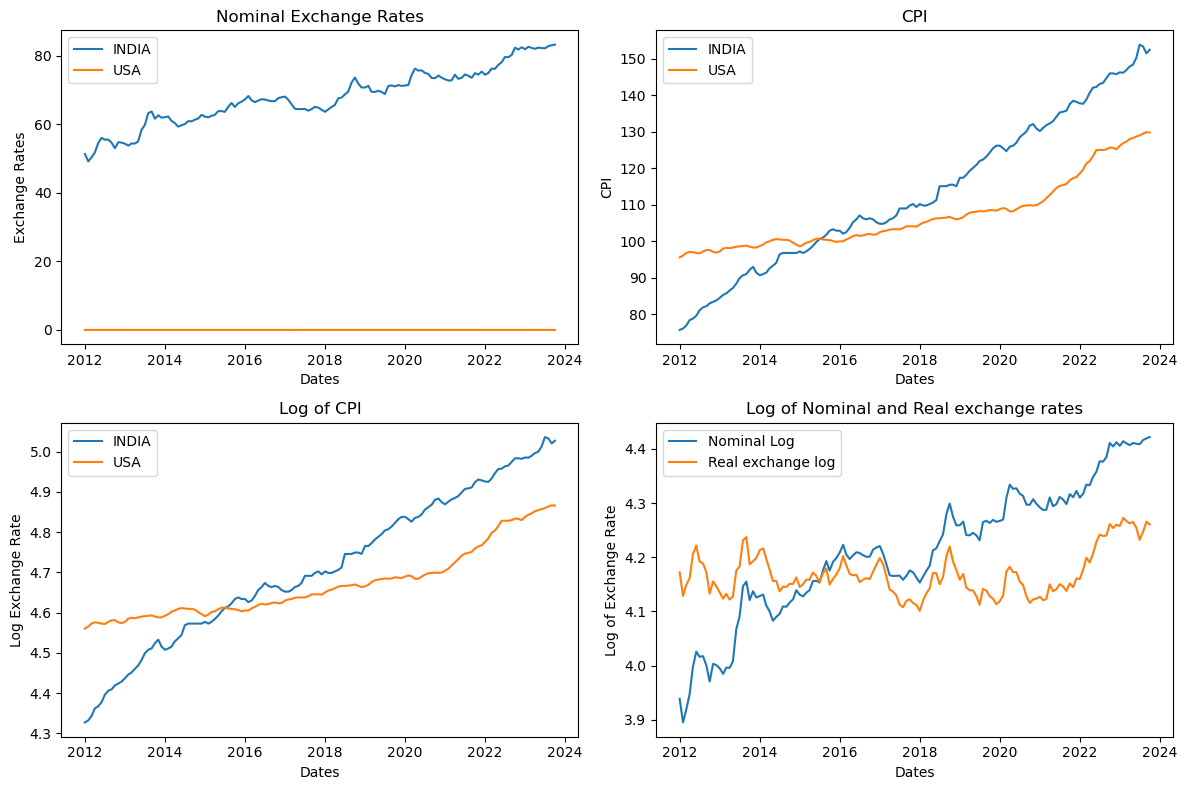

In [112]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Data1['Dates'], Data1['Nominal ER(IND)'], label='INDIA')
plt.plot(Data1['Dates'], Data1['Nominal ER(USA)'], label='USA')
plt.title('Nominal Exchange Rates')
plt.xlabel('Dates')
plt.ylabel('Exchange Rates')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(Data1['Dates'], Data1['IND (CPI)'], label='INDIA')
plt.plot(Data1['Dates'], Data1['USA(CPI)'], label='USA')
plt.title('CPI')
plt.xlabel('Dates')
plt.ylabel('CPI')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(Data1['Dates'], Data1['Home_CPI_Log'], label='INDIA')
plt.plot(Data1['Dates'], Data1['Foreign_CPI_Log'], label='USA')
plt.title('Log of CPI')
plt.xlabel('Dates')
plt.ylabel('Log Exchange Rate')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(Data1['Dates'], Data1['Nominal_Log '], label='Nominal Log')
plt.plot(Data1['Dates'], Data1['Real_Log'], label='Real exchange log')
plt.title('Log of Nominal and Real exchange rates')
plt.xlabel('Dates')
plt.ylabel('Log of Exchange Rate')
plt.legend()

plt.tight_layout()
plt.show()

In [94]:
Data1.corr()

/var/folders/99/hx5zk7s55_18r2yl0nbc6k1m0000gn/T/ipykernel_5934/3558347086.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data1.corr()


,IND (CPI),USA(CPI),Nominal ER(IND),Nominal ER(USA),RER(e * (P*/P),Nominal_Log,Real_Log,Home_CPI_Log,Foreign_CPI_Log
IND (CPI),1.000000,0.984589,0.992312,-0.981399,0.855897,0.988766,0.852049,0.997703,0.987789
USA(CPI),0.984589,1.000000,0.975871,-0.948292,0.916664,0.964252,0.913240,0.971551,0.999747
Nominal ER(IND),0.992312,0.975871,1.000000,-0.993511,0.882711,0.998537,0.879812,0.991315,0.978633
Nominal ER(USA),-0.981399,-0.948292,-0.993511,1.000000,-0.840633,-0.998186,-0.837871,-0.987687,-0.952957
RER(e * (P*/P),0.855897,0.916664,0.882711,-0.840633,1.000000,0.863795,0.999922,0.828807,0.909792
Nominal_Log,0.988766,0.964252,0.998537,-0.998186,0.863795,1.000000,0.860961,0.991258,0.967946
Real_Log,0.852049,0.913240,0.879812,-0.837871,0.999922,0.860961,1.000000,0.824884,0.906315
Home_CPI_Log,0.997703,0.971551,0.991315,-0.987687,0.828807,0.991258,0.824884,1.000000,0.976053
Foreign_CPI_Log,0.987789,0.999747,0.978633,-0.952957,0.909792,0.967946,0.906315,0.976053,1.000000


In [38]:
#3STEP e)	Test the validity for the absolute form of Purchasing Power Parity.

from statsmodels.tsa.stattools import adfuller


adf_result = adfuller(Data1['Nominal_Log '].diff().dropna())

adf_statistic = adf_result[0]
p_value = adf_result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis - The differenced series is stationary. Relative PPP may hold.")
else:
    print("Fail to reject the null hypothesis - The differenced series is not stationary. Relative PPP may not hold.")


 


ADF Statistic: -7.5217244042704445
p-value: 3.77535829709099e-11
Reject the null hypothesis - The differenced series is stationary. Relative PPP may hold.


'implied_exchange_rates = Data1[\'Foreign_CPI_Log\'].apply(np.exp) / Data1[\'Home_CPI_Log\'].apply(np.exp)\n\ndeviation_from_ppp = np.abs(implied_exchange_rates - Data1[\'Nominal ER(IND)\'])\n\n# Set threshold for significance\nthreshold = 0.01\n\n# Check for significant deviation\nsignificant_deviation = deviation_from_ppp > threshold\n\n# Display results\nprint("Implied Exchange Rates:")\nprint(implied_exchange_rates.head())\nprint("\nActual Exchange Rates:")\nprint(Data1[\'Nominal ER(IND)\'].head())\nprint("\nDeviation from PPP (Threshold = 0.01):")\nprint(deviation_from_ppp.head())\nprint("\nSignificant Deviation:")\nprint(significant_deviation.head())\n\n\nX_abs = Data1[\'Nominal_Log \'] - ( Data1[\'Home_CPI_Log\'] -  Data1[\'Foreign_CPI_Log\'])\nX_abs = sm.add_constant(X_abs)\ny_abs = Data1[\'Nominal_Log \']\nmodel_abs = sm.OLS(y_abs, X_abs).fit()\nprint(model_abs.summary())\n'

In [39]:
#STEP F 	Test the validity for the relative form of Purchasing Power Parity.
from statsmodels.tsa.stattools import coint


y_coint = Data1['Nominal_Log ']
X_coint = Data1['Home_CPI_Log'] - Data1['Foreign_CPI_Log']


cointegration_test = coint(y_coint, X_coint)


test_statistic = cointegration_test[0]
p_value = cointegration_test[1]
critical_values = cointegration_test[2]

print(f'Cointegration test statistic: {test_statistic}')
print(f'p-value: {p_value}')
print(f'Critical values: {critical_values}')

if p_value < 0.05:
    print("Reject the null hypothesis - The series are cointegrated.")
else:
    print("Fail to reject the null hypothesis - The series may not be cointegrated.")







Cointegration test statistic: -3.391687984131377
p-value: 0.04328210429534137
Critical values: [-3.90744751 -3.3422592  -3.04870243]
Reject the null hypothesis - The series are cointegrated.


"print(Data1.isnull().sum())\nData1.fillna(method='ffill', inplace=True)\nX_rel.replace([np.inf, -np.inf], np.nan, inplace=True)\nX_rel['diff_log_cpi'].fillna(X_rel['diff_log_cpi'].mean(), inplace=True)\nX_rel.dropna(inplace=True)\nprint(np.isinf(X_rel).sum())\nprint(np.isnan(X_rel).sum())\n\nData1['diff_log_cpi'] = Data1['Home_CPI_Log'] - Data1['Foreign_CPI_Log']\nX_rel = Data1['diff_log_cpi'].diff().shift(-1)\nX_rel = sm.add_constant(X_rel)\ny_rel = Data1['Nominal_Log '].diff().shift(-1)\nmodel_rel = sm.OLS(y_rel, X_rel).fit()\nprint(model_rel.summary())"

In [133]:
#g)	Model and forecast the real exchange rate using the Box-Jenkins modelling procedure. Estimate at least 6 models.
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


new_data = pd.read_csv('/Users/nileshkhatiya/Downloads/BF_ExchangeRatesData1.csv')


new_data['Dates'] = pd.to_datetime(new_data['Dates'], format='%b-%y')


new_data.dropna(subset=['Dates'], inplace=True)


new_data.set_index('Dates', inplace=True)


new = new_data['RER(e * (P*/P)']


n_steps = 12


arima_models = [
    (1, 0, 0),  # ARIMA(1,0,0)
    (0, 1, 1),  # ARIMA(0,1,1)
    (2, 1, 0),  # ARIMA(2,1,0)
    (1, 1, 1),  # ARIMA(1,1,1)
    (2, 1, 1),  # ARIMA(2,1,1)
    (1, 0, 1)   # ARIMA(1,0,1)
]


forecasts = []


for model_params in arima_models:
    order = model_params
    try:
        
        model = ARIMA(rer.astype(float), order=order)
        results = model.fit()
        
        forecast = results.forecast(steps=n_steps)
        forecasts.append(forecast)
    except Exception as e:
        print(f"Error fitting ARIMA{order}: {e}")


for i, forecast in enumerate(forecasts):
    print(f'Model {i+1} Forecast:', forecast)




/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

Model 1 Forecast: 2023-11-01    70.443222
2023-12-01    70.066053
2024-01-01    69.715925
2024-02-01    69.390900
2024-03-01    69.089178
2024-04-01    68.809087
2024-05-01    68.549078
2024-06-01    68.307710
2024-07-01    68.083648
2024-08-01    67.875649
2024-09-01    67.682563
2024-10-01    67.503321
Freq: MS, Name: predicted_mean, dtype: float64
Model 2 Forecast: 2023-11-01    70.783163
2023-12-01    70.783163
2024-01-01    70.783163
2024-02-01    70.783163
2024-03-01    70.783163
2024-04-01    70.783163
2024-05-01    70.783163
2024-06-01    70.783163
2024-07-01    70.783163
2024-08-01    70.783163
2024-09-01    70.783163
2024-10-01    70.783163
Freq: MS, Name: predicted_mean, dtype: float64
Model 3 Forecast: 2023-11-01    70.666852
2023-12-01    70.683812
2024-01-01    70.705277
2024-02-01    70.705982
2024-03-01    70.703776
2024-04-01    70.703442
2024-05-01    70.703639
2024-06-01    70.703697
2024-07-01    70.703683
2024-08-01    70.703675
2024-09-01    70.703676
2024-10-01  

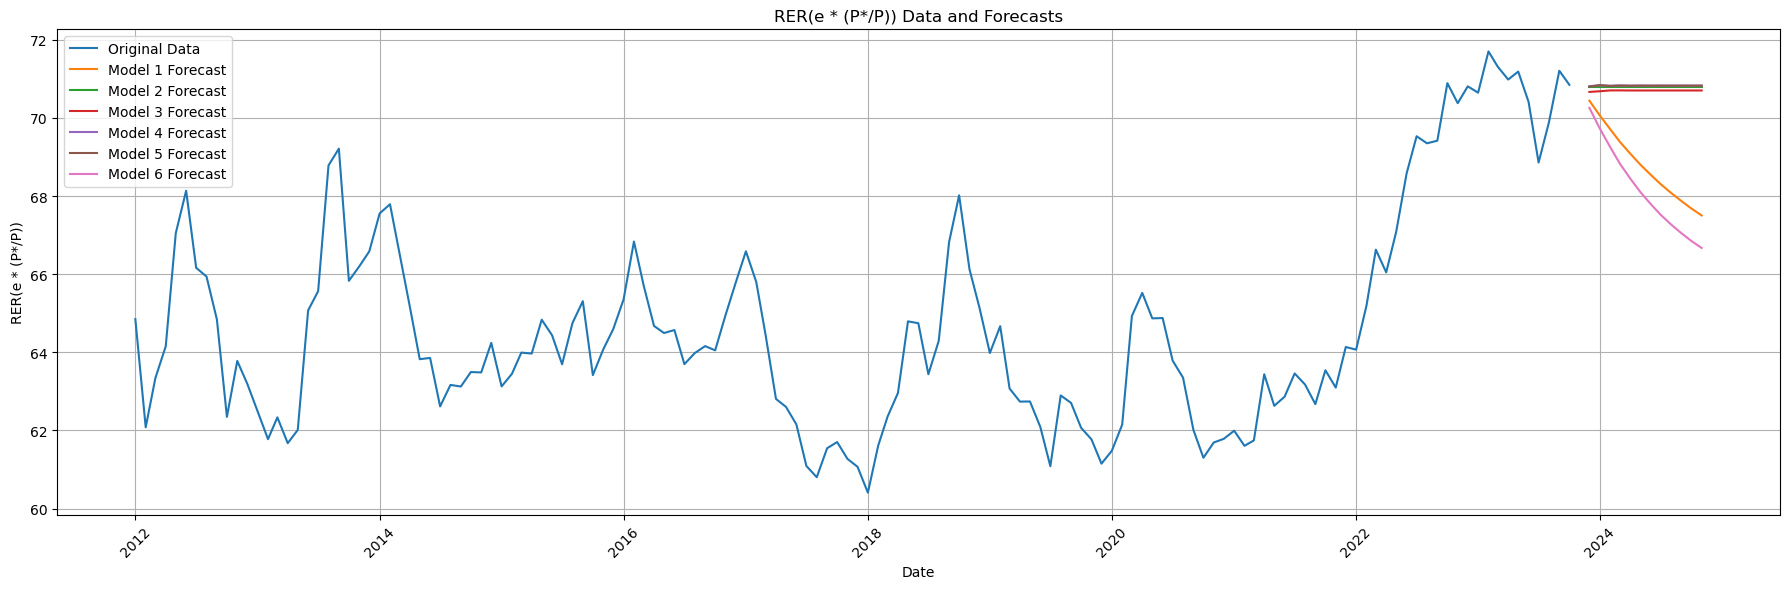

In [111]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 6))
plt.plot(new_data.index, rer, label='Original Data')


for i, forecast in enumerate(forecasts):
    forecast_dates = pd.date_range(start=new_data.index[-1], periods=n_steps+1, freq='M')[1:]  # Generate dates for forecasts
    plt.plot(forecast_dates, forecast, label=f'Model {i+1} Forecast')

plt.title('RER(e * (P*/P)) Data and Forecasts')
plt.xlabel('Date')
plt.ylabel('RER(e * (P*/P))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [116]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


ts_data = Data1['Real_Log']

# Define different ARIMA model configurations
arima_configs = [
    (1, 0, 0),  # ARIMA(1,0,0)
    (0, 1, 1),  # ARIMA(0,1,1)
    (2, 1, 0),  # ARIMA(2,1,0)
    (1, 1, 1),  # ARIMA(1,1,1)
    (2, 1, 1),  # ARIMA(2,1,1)
    (1, 0, 1)   # ARIMA(1,0,1)
]


for p, d, q in arima_configs:
   
    model_arima = ARIMA(ts_data, order=(p, d, q))
    fitted_model = model_arima.fit()

   
    forecasts = fitted_model.forecast(steps=12)
    
   
    residuals = ts_data - fitted_model.fittedvalues
    rmse = np.sqrt(np.mean(residuals**2))

   
    print(f"ARIMA({p},{d},{q}) - RMSE: {rmse}")

    


ARIMA(1,0,0) - RMSE: 0.006727495336476987
ARIMA(0,1,1) - RMSE: 0.1321477098225765
ARIMA(2,1,0) - RMSE: 0.132146822373666


/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1,1,1) - RMSE: 0.13214658647808544


/Users/nileshkhatiya/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,1) - RMSE: 0.13214679905781274
ARIMA(1,0,1) - RMSE: 0.006687453621468272


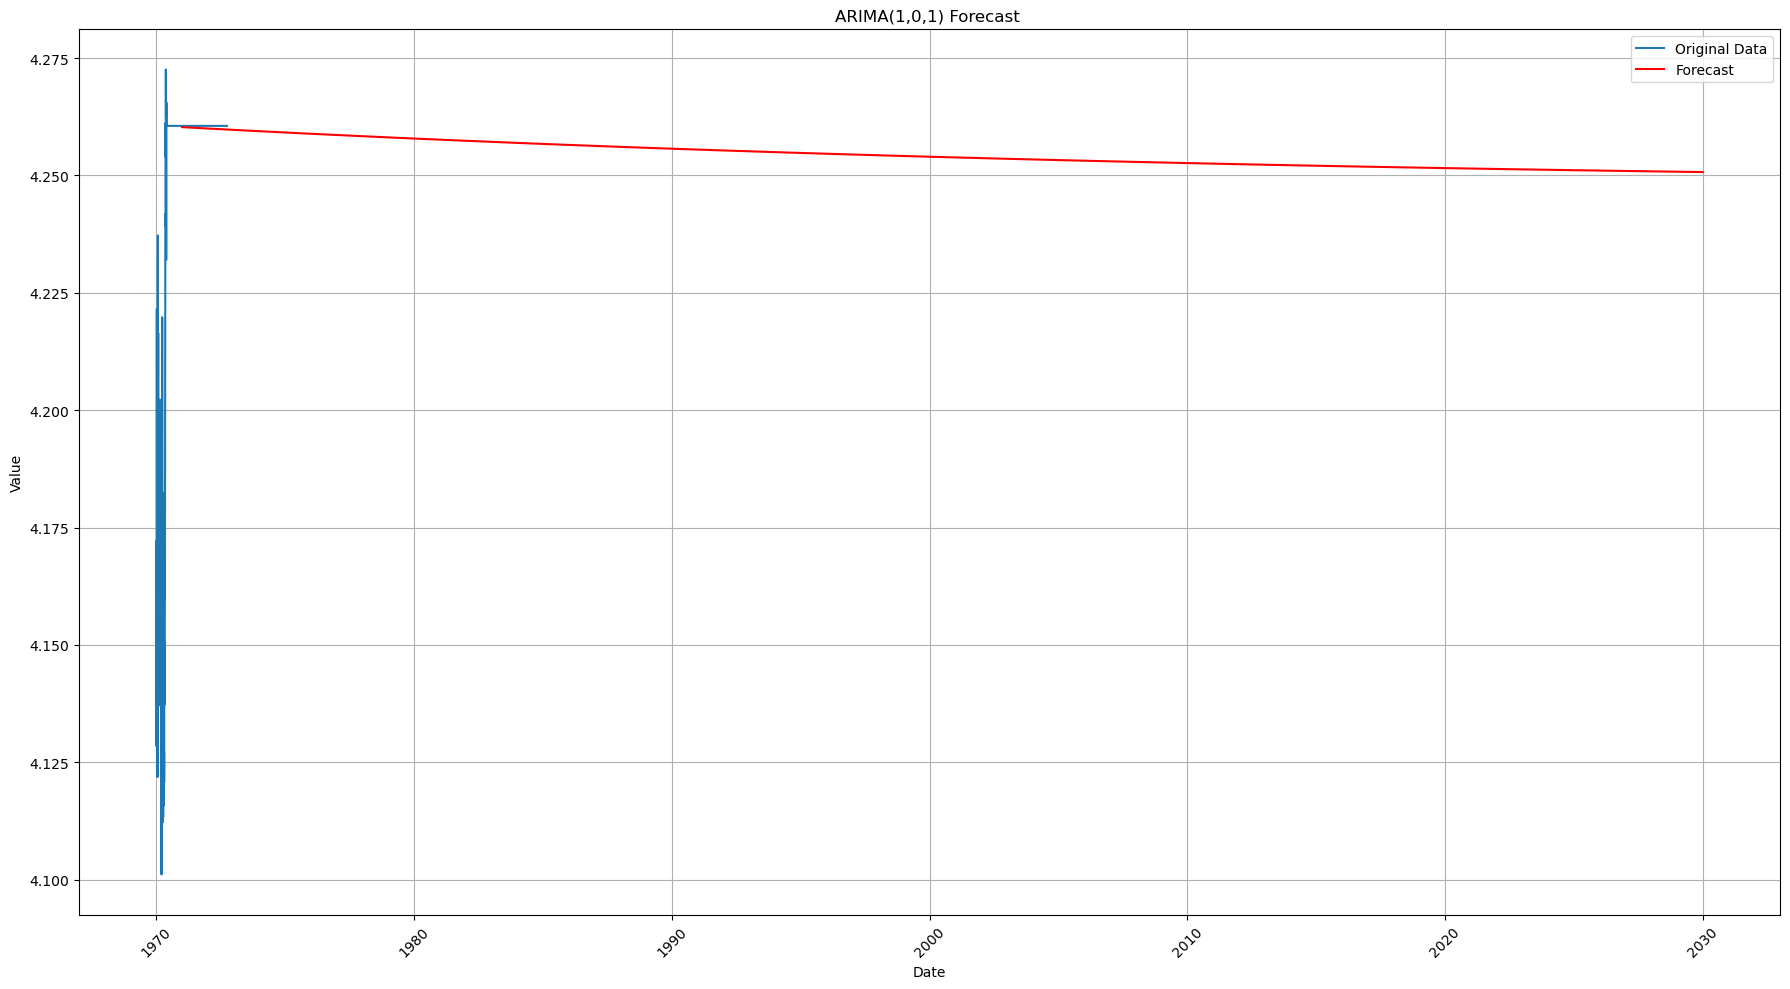

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA




best_model = ARIMA(ts_data, order=(1, 0, 1))
fitted_model = best_model.fit()


forecast_steps = 60
forecast = fitted_model.forecast(steps=forecast_steps)


last_date = ts_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps, freq='Y')



plt.figure(figsize=(18, 10))
plt.plot(ts_data.index, ts_data, label='Original Data')


plt.plot(forecast_dates, forecast, label='Forecast', color='red')


plt.title('ARIMA(1,0,1) Forecast ')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


